In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1XEFg047aSbg3OsEVx9PzmgSxGbCvCidfLiHfsgRS3R0/export?format=csv&gid=0")
df["Date Announced"] = pd.to_datetime(df["Date Announced"])
df["Date Added"] = pd.to_datetime(df["Date Added"])
df.head(4)

,Prefecture Patient Number,City Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Notes,Source(s),Related Patients,Known Cluster,Deceased,MHLW (Orig) Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Has ID,Prefecture URL (Auto)
0,1,NaN,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,9,1.0,NaN,0.0,NaN
1,2,NaN,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,Charter Flight,NaN,14,1.0,NaN,0.0,NaN
2,3,NaN,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,Charter Flight,NaN,15,1.0,NaN,0.0,NaN
3,4,Chiba#2,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Chiba,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,16,1.0,NaN,2.0,NaN


### Clean Data

In [3]:
def processAge(value):
    if value in ["0ver 90", "Over 90", "elderly", "above 90"]:
        return "Over 90"

    if value in ["Under10", "under10"]:
        return "Under 10"
    
    if value in ["Unspecified", "unspecified", "Unspecifed", "Undisclosed", "Not public", "-"]:
        return "Unspecified"

    return value

In [4]:
# Age Processing
df["Age Bracket"] = df["Age Bracket"].apply(processAge)

# Swap Gender and Age Bracket correctly
gender_mask = df["Age Bracket"].isin(["M", "F"])
mapping = {"Age Bracket": "Gender", "Gender": "Age Bracket"}
df.update(df.loc[gender_mask].rename(mapping, axis=1))

/var/folders/82/pns0pt816_92_gy_53jnrh9r0000gn/T/ipykernel_11682/2488809316.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(df.loc[gender_mask].rename(mapping, axis=1))


### Vẽ biểu đồ cho biết số ca nhiễm theo từng ngày

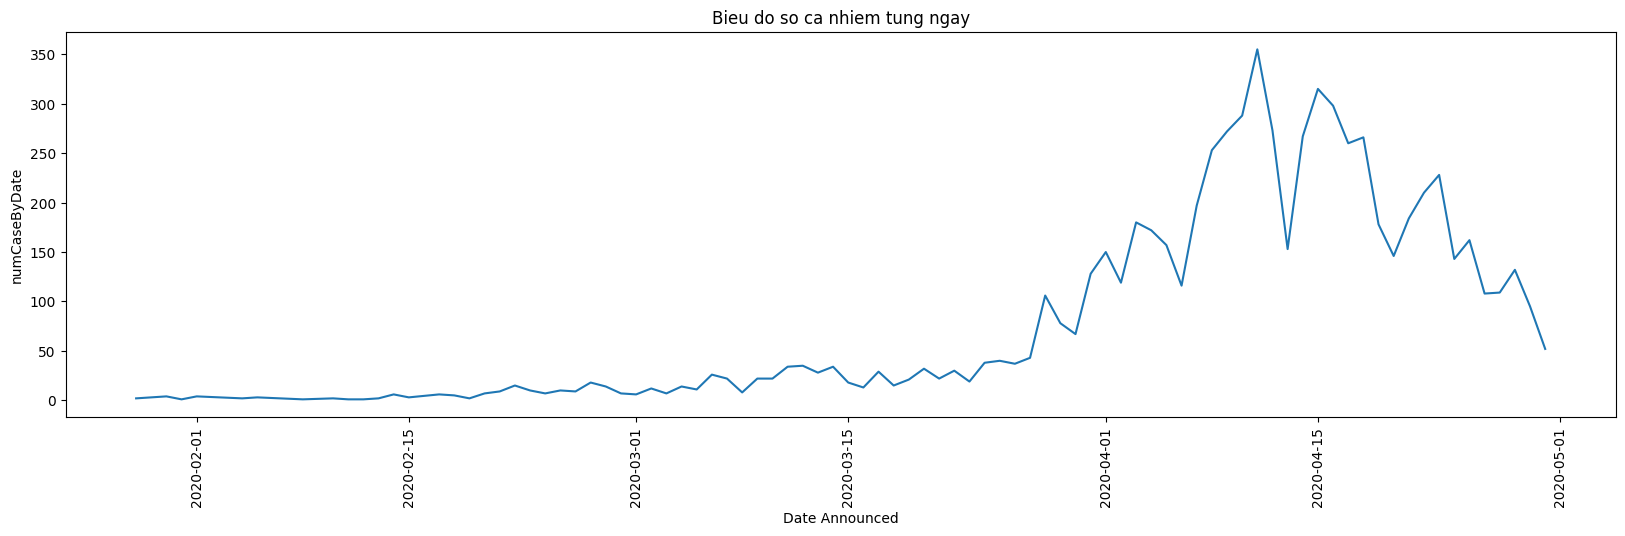

In [5]:
numCaseByDate = pd.DataFrame(df.groupby(['Date Announced']).apply(lambda x: len(x))).reset_index().rename(columns={0: "numCaseByDate"})
plt.figure(figsize=(20,5))
plt.title("Bieu do so ca nhiem tung ngay")
sns.lineplot(data=numCaseByDate, x="Date Announced", y="numCaseByDate")
plt.xticks(rotation=90)
plt.show()

### Liệt kê số ca nhiếm theo từng thành phố

In [6]:
numCaseCity = pd.DataFrame(df.groupby(['Detected City']).apply(lambda x: len(x))).reset_index().rename(columns={0: "numCaseCity"})
numCaseCity

,Detected City,numCaseCity
0,Abiko,2
1,Agano,3
2,Ageo,1
3,Ainan,1
4,Aira,2
...,...,...
469,Yukuhashi,1
470,Yukuhasi,1
471,Yurihonjo,2
472,unspecified,6


### Vẽ biểu đồ liệt kê số ca nhiễm theo độ tuổi

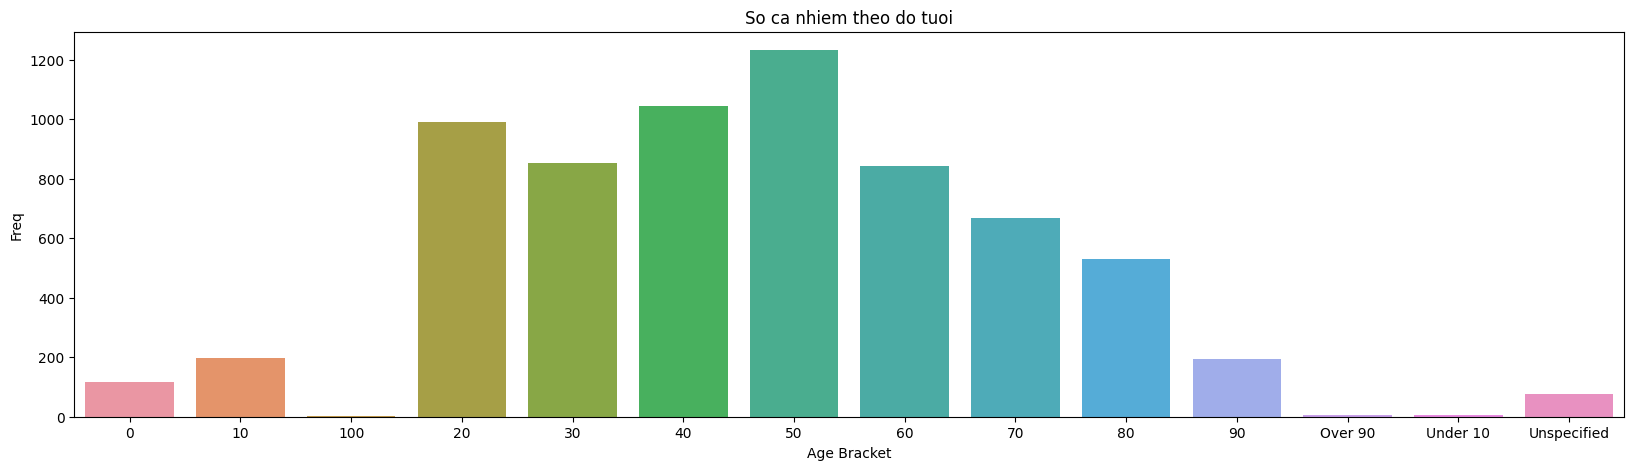

In [7]:
caseByAge = df.groupby(['Age Bracket']).apply(lambda x: len(x)).reset_index().rename(columns={0:"Freq"})
plt.figure(figsize=(20,5))
plt.title("So ca nhiem theo do tuoi")
sns.barplot(data=caseByAge, x="Age Bracket", y="Freq")
plt.show()

### Vẽ biểu đồ liệt kê số ca nhiễm tại Hokkaido theo từng ngày

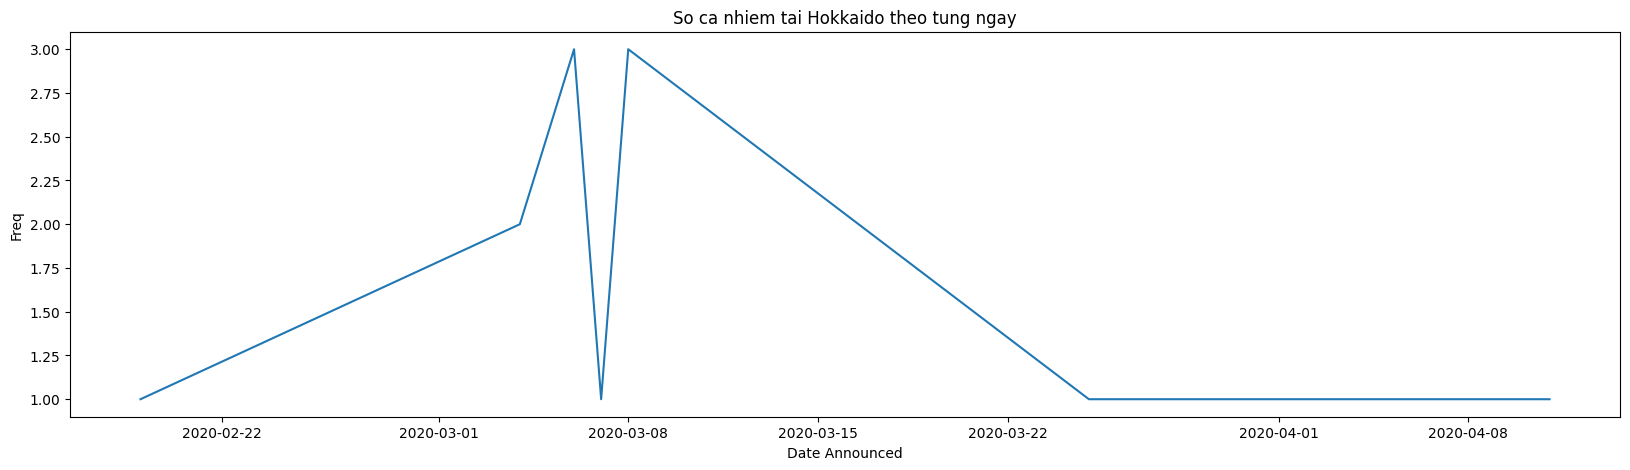

In [8]:
caseHokaido = df[df["Residence City, Prefecture"].isin(["Hokkaido", "Hokkaido",])].groupby(["Date Announced"]).apply(lambda x: len(x)).reset_index().rename(columns={0:"Freq"})
plt.figure(figsize=(20,5))
plt.title("So ca nhiem tai Hokkaido theo tung ngay")
sns.lineplot(caseHokaido, x="Date Announced", y="Freq")
plt.show()